## Prepare a classification model using SVM for salary data 

## Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = 'SalaryData_Train.csv'
dataframe_train = pd.read_csv(filename)
dataframe_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
filename = 'SalaryData_Test.csv'
dataframe_test = pd.read_csv(filename)
dataframe_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
dataframe_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dataframe_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
dataframe_train.shape

(30161, 14)

In [7]:
dataframe_test.shape

(15060, 14)

In [8]:
dataframe_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
dataframe_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
dataframe_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,30161.0,38.438115,13.134830,17.0,28.0,37.0,47.0,90.0
educationno,30161.0,10.121316,2.550037,1.0,9.0,10.0,13.0,16.0
capitalgain,30161.0,1092.044064,7406.466611,0.0,0.0,0.0,0.0,99999.0
capitalloss,30161.0,88.302311,404.121321,0.0,0.0,0.0,0.0,4356.0
hoursperweek,30161.0,40.931269,11.980182,1.0,40.0,40.0,45.0,99.0


In [11]:
dataframe_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,15060.0,38.768327,13.380676,17.0,28.0,37.0,48.0,90.0
educationno,15060.0,10.112749,2.558727,1.0,9.0,10.0,13.0,16.0
capitalgain,15060.0,1120.301594,7703.181842,0.0,0.0,0.0,0.0,99999.0
capitalloss,15060.0,89.041899,406.283245,0.0,0.0,0.0,0.0,3770.0
hoursperweek,15060.0,40.951594,12.062831,1.0,40.0,40.0,45.0,99.0


# Data Preprocessing - Converting Categorical data into numerical data using label encoder

In [12]:
lb = LabelEncoder()

In [13]:
dataframe_train["workclass"] = lb.fit_transform(dataframe_train["workclass"])
dataframe_train["education"] = lb.fit_transform(dataframe_train["education"])
dataframe_train["maritalstatus"] = lb.fit_transform(dataframe_train["maritalstatus"])
dataframe_train["occupation"] = lb.fit_transform(dataframe_train["occupation"])
dataframe_train["relationship"] = lb.fit_transform(dataframe_train["relationship"])
dataframe_train["race"] = lb.fit_transform(dataframe_train["race"])
dataframe_train["sex"] = lb.fit_transform(dataframe_train["sex"])
dataframe_train["native"] = lb.fit_transform(dataframe_train["native"])
dataframe_train["Salary"] = lb.fit_transform(dataframe_train["Salary"])

In [14]:
dataframe_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [15]:
dataframe_test["workclass"] = lb.fit_transform(dataframe_test["workclass"])
dataframe_test["education"] = lb.fit_transform(dataframe_test["education"])
dataframe_test["maritalstatus"] = lb.fit_transform(dataframe_test["maritalstatus"])
dataframe_test["occupation"] = lb.fit_transform(dataframe_test["occupation"])
dataframe_test["relationship"] = lb.fit_transform(dataframe_test["relationship"])
dataframe_test["race"] = lb.fit_transform(dataframe_test["race"])
dataframe_test["sex"] = lb.fit_transform(dataframe_test["sex"])
dataframe_test["native"] = lb.fit_transform(dataframe_test["native"])
dataframe_test["Salary"] = lb.fit_transform(dataframe_test["Salary"])

In [16]:
dataframe_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


# EDA

In [17]:
dataframe_train[dataframe_train.isnull().any(axis=1)]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [18]:
dataframe_test[dataframe_test.isnull().any(axis=1)]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


In [19]:
dataframe_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [20]:
dataframe_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
dataframe_train['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [22]:
dataframe_test['Salary'].value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

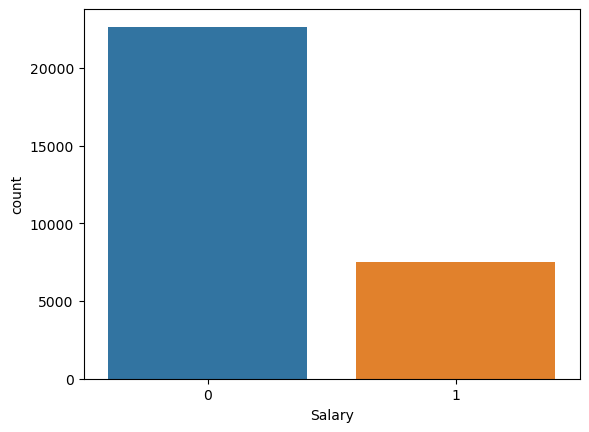

0    22653
1     7508
Name: Salary, dtype: int64

In [23]:
sns.countplot(x='Salary',data= dataframe_train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
dataframe_train['Salary'].value_counts()

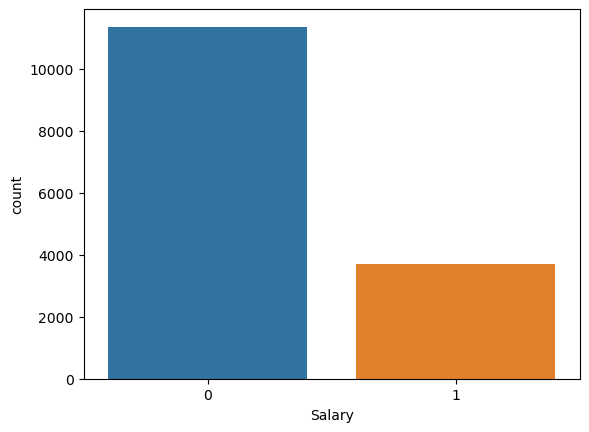

0    11360
1     3700
Name: Salary, dtype: int64

In [24]:
sns.countplot(x='Salary',data= dataframe_test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
dataframe_test['Salary'].value_counts()

<AxesSubplot:xlabel='occupation', ylabel='workclass'>

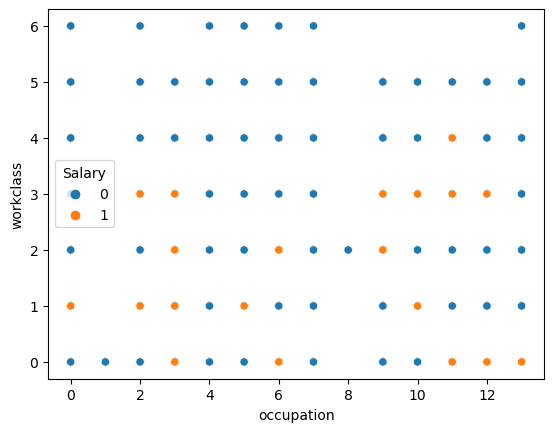

In [25]:
sns.scatterplot(dataframe_train['occupation'],dataframe_train['workclass'],hue=dataframe_train['Salary'])

<AxesSubplot:xlabel='occupation', ylabel='workclass'>

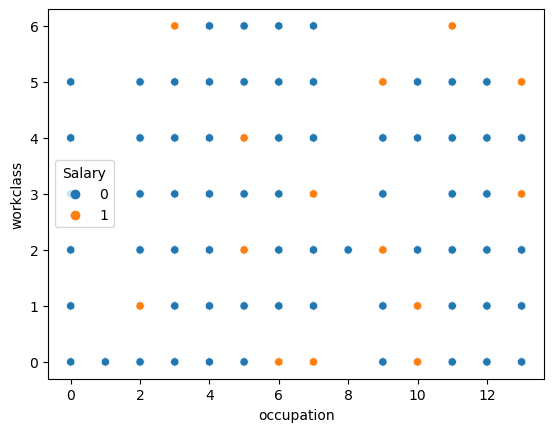

In [26]:
sns.scatterplot(dataframe_test['occupation'],dataframe_test['workclass'],hue=dataframe_train['Salary'])

In [27]:
colnames=dataframe_test.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [28]:
data_sample_train=dataframe_train.sample(n=2000,random_state=41)
data_sample_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
12593,18,2,1,7,4,7,3,4,0,0,0,12,37,0
8439,20,5,15,10,4,7,3,4,0,0,0,20,37,0
3905,46,2,15,10,0,11,1,4,1,0,0,50,37,0
26023,65,2,11,9,6,7,4,2,0,0,0,20,21,0
4879,31,2,11,9,2,13,0,4,1,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6752,58,2,11,9,2,6,0,4,1,0,0,40,37,0
17345,28,2,9,13,4,11,4,4,1,0,0,50,37,0
16593,58,2,11,9,6,2,4,4,1,8614,0,52,24,1
24486,34,2,15,10,2,5,0,4,1,0,0,40,37,0


In [29]:
data_sample_test=dataframe_test.sample(n=2000,random_state=41)
data_sample_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
9311,38,2,11,9,5,6,4,4,0,0,0,40,37,0
11500,21,2,15,10,4,7,1,4,1,0,0,35,37,0
7590,44,3,11,9,0,7,4,4,0,0,0,33,37,0
14673,25,2,15,10,4,3,3,4,0,0,0,40,37,0
2381,35,1,12,14,2,9,0,4,1,0,0,45,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,50,4,12,14,2,9,0,4,1,0,0,40,37,0
50,63,2,11,9,2,2,0,4,1,0,0,40,37,0
7556,45,3,9,13,2,11,0,4,1,7298,0,40,37,1
13647,34,2,15,10,4,3,1,4,0,2174,0,50,37,0


In [30]:
x_train = data_sample_train[colnames[0:13]]
y_train = data_sample_train[colnames[13]]
x_test = data_sample_test[colnames[0:13]]
y_test = data_sample_test[colnames[13]]

In [31]:
from sklearn.preprocessing import minmax_scale

In [32]:
x_train = minmax_scale(x_train)
y_train = minmax_scale(y_train)
x_test = minmax_scale(x_test)
y_test = minmax_scale(y_test)

In [33]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2000, 13), (2000,), (2000, 13), (2000,))

In [34]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [35]:
gsv.best_params_ , gsv.best_score_ 

({'C': 13, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8390000000000001)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [37]:
clf = SVC(C= 13,gamma = 0.5)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 85.0


array([[1437,   90],
       [ 210,  263]], dtype=int64)